In [36]:
%load_ext autoreload
%autoreload 2
from exercises import house_price_prediction as hpp
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
from IMLearn.learners.regressors.polynomial_fitting import PolynomialFitting

df = pd.read_csv('./datasets/City_Temperature.csv')
df.columns

Index(['Country', 'City', 'Date', 'Year', 'Month', 'Day', 'Temp'], dtype='object')

In [38]:
df = pd.read_csv('/home/yishailavi124/IML.HUJI/datasets/house_prices.csv')
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

/home/yishailavi124/IML.HUJI/exercises/house_price_prediction.py:32: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  df.date = pd.to_datetime(df.date, errors='coerce').astype(int)


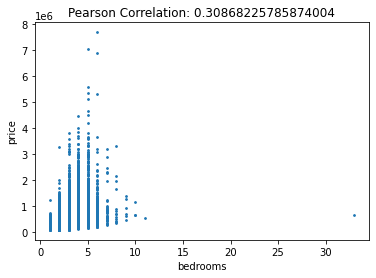

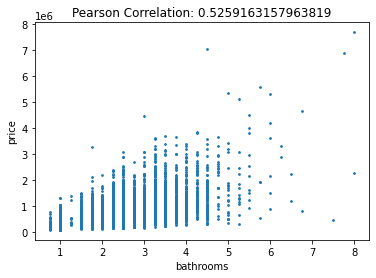

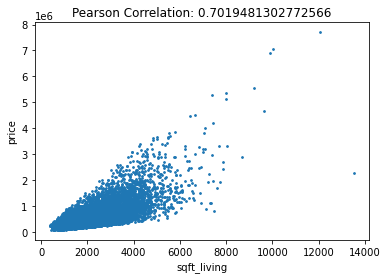

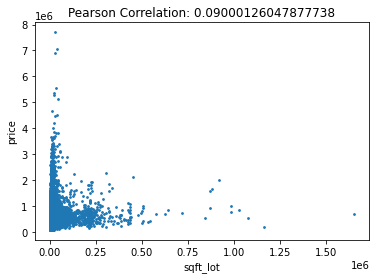

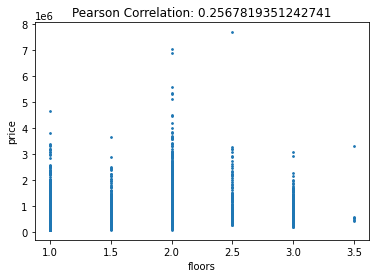

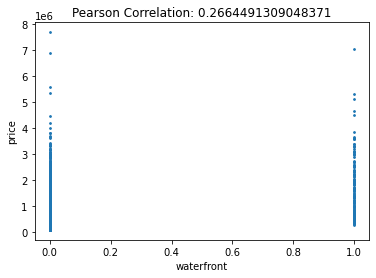

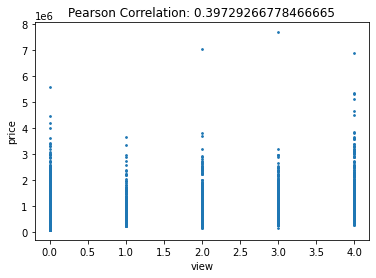

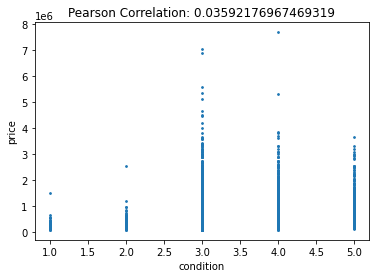

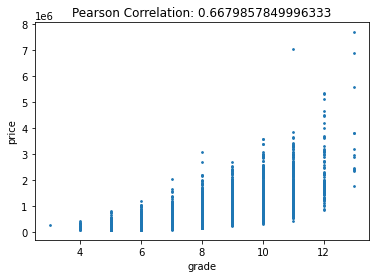

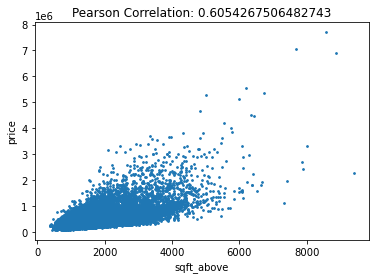

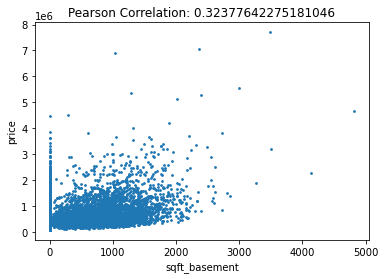

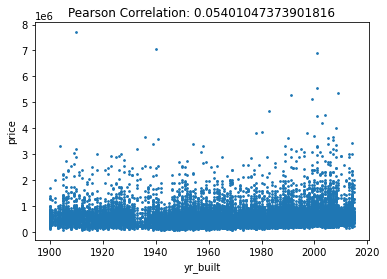

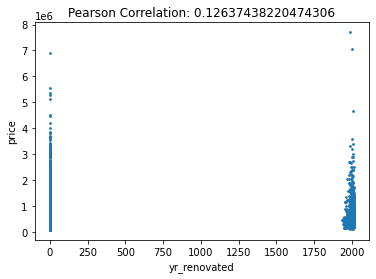

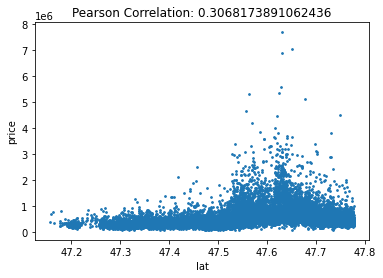

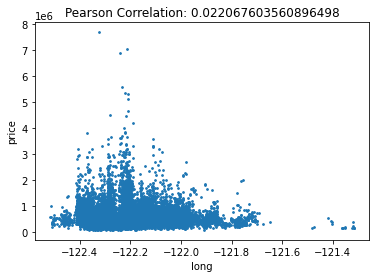

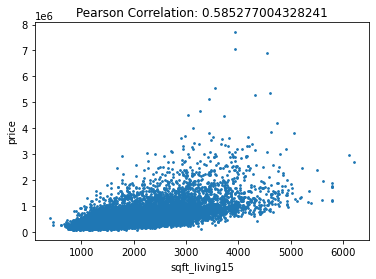

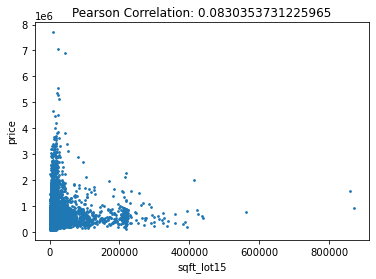

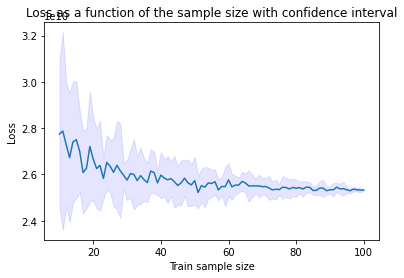

In [39]:
from IMLearn.learners.regressors.linear_regression import LinearRegression
from IMLearn import utils

np.random.seed(0)
# Question 1 - Load and preprocessing of housing prices dataset
X, y, not_dummies = hpp.load_data('./datasets/house_prices.csv')

# Question 2 - Feature evaluation with respect to response
hpp.feature_evaluation(X, y, './exercises/plots/', not_dummies)

# Question 3 - Split samples into training- and testing sets.
train_X, train_y, test_X, test_y = utils.split_train_test(X,y,0.75)

# Question 4 - Fit model over increasing percentages of the overall training data
# For every percentage p in 10%, 11%, ..., 100%, repeat the following 10 times:
#   1) Sample p% of the overall training data
#   2) Fit linear model (including intercept) over sampled set
#   3) Test fitted model over test set
#   4) Store average and variance of loss over test set
# Then plot average loss as function of training size with error ribbon of size (mean-2*std, mean+2*std)
range_arr = np.arange(10,101,1)
mean_list = []
std_list = []
for p in range_arr:
    p_loss = np.zeros(10)
    for i in range(10):
        sample = train_X.sample(frac=p/100)
        reg_model = LinearRegression()
        reg_model.fit(sample, train_y[sample.index])
        p_loss[i] = reg_model.loss(test_X, test_y)
    mean_list.append(p_loss.mean())
    std_list.append(p_loss.std())
mean_list = np.asarray(mean_list)    
std_list = np.asarray(std_list) 
confidence = 2*std_list

plt.figure()
plt.plot(range_arr,mean_list)
plt.xlabel('Train sample size')
plt.ylabel('Loss')
plt.title('Loss as a function of the sample size with confidence interval')
plt.fill_between(range_arr, mean_list-confidence, mean_list+confidence, color='b', alpha=.1)
plt.show()


In [40]:
reg_model.coefs_

array([-2.50228666e+07, -3.03480335e+04,  2.55530341e+04,  1.12400268e+02,
        2.36022599e-01, -4.38571631e+04,  5.73181149e+05,  5.30392580e+04,
        2.57726783e+04,  5.79150764e+04,  9.45041260e+01,  1.78306019e+01,
       -7.75304503e+02,  2.01707698e+01,  2.59054741e+05, -1.16787150e+05,
        1.20158144e+01, -1.46636434e-01, -4.99114275e+05, -4.65839587e+05,
       -5.24924545e+05,  1.97048768e+05, -2.69535361e+05, -2.77502764e+05,
       -3.19092738e+05, -3.21696768e+05, -4.08981913e+05, -4.85711558e+05,
       -4.53999245e+05, -4.86124202e+05, -4.53965874e+05, -5.42147790e+05,
       -3.63689021e+05, -3.60017800e+05, -4.94229935e+05, -3.21988748e+05,
       -4.99628547e+05, -5.00390107e+05, -5.10580693e+05, -2.18716274e+05,
       -4.03905434e+05, -4.57966468e+05,  8.20883688e+05, -4.32888434e+04,
       -4.97468440e+05, -3.92434548e+05, -3.54095741e+05, -3.81492389e+05,
       -4.90313332e+05, -4.43421222e+05, -4.92383084e+05, -4.44291913e+05,
       -4.26002920e+05, -

min val: 40419994937.9462

In [41]:
np.sqrt(40419994937.9462)

201047.24553682946

In [42]:
y.mean()

540305.3992032611

In [43]:
reg_model = LinearRegression(True)
reg_model.fit(X,y)
reg_model.loss(X, y)

25825970481.020416

In [44]:
reg_model = LinearRegression()
reg_model.fit(X,y)
reg_model.loss(X,y)

25825970481.020416

In [45]:
reg_model.coefs_

array([-2.48710939e+07, -2.66076524e+04,  2.33853987e+04,  1.12691444e+02,
        2.45118528e-01, -4.56368913e+04,  6.58225633e+05,  5.54374074e+04,
        2.55096867e+04,  5.77096861e+04,  9.59815845e+01,  1.68148501e+01,
       -7.11943386e+02,  1.71713095e+01,  2.18226354e+05, -1.30366744e+05,
        9.94516851e+00, -1.30237774e-01, -5.09048095e+05, -4.74133369e+05,
       -5.31839259e+05,  2.07224062e+05, -2.62204811e+05, -2.82026706e+05,
       -3.15726270e+05, -3.06088392e+05, -4.11465419e+05, -4.75581440e+05,
       -4.32551547e+05, -4.70455778e+05, -4.66514717e+05, -5.55911172e+05,
       -3.62840838e+05, -3.58240185e+05, -4.82823652e+05, -3.18672978e+05,
       -5.06171982e+05, -5.04576368e+05, -5.17503407e+05, -2.16781096e+05,
       -3.89575437e+05, -4.59378221e+05,  7.41194086e+05, -4.96755564e+04,
       -4.96215590e+05, -3.88801673e+05, -3.44766337e+05, -3.68089468e+05,
       -4.85735213e+05, -4.45130037e+05, -4.95219743e+05, -4.49348303e+05,
       -4.21635115e+05, -

In [46]:
from sklearn import linear_model
from IMLearn.metrics.loss_functions import mean_square_error

test_model = linear_model.LinearRegression().fit(X,y)
pred = test_model.predict(X)
mean_square_error(pred,y)

/home/yishailavi124/anaconda3/envs/iml_v1/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,
/home/yishailavi124/anaconda3/envs/iml_v1/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


25826032435.521072

In [47]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21611    360000.0
21612    400000.0
21613    402101.0
21614    400000.0
21615    325000.0
Name: price, Length: 21588, dtype: float64

In [48]:
X[:np.ceil(np.percentile(np.arange(len(X)),75)).astype(int)]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,98146.0,98148.0,98155.0,98166.0,98168.0,98177.0,98178.0,98188.0,98198.0,98199.0
0,3,1.00,1180,5650,1.0,0,0.0,3.0,7.0,1180.0,...,0,0,0,0,0,0,1,0,0,0
1,3,2.25,2570,7242,2.0,0,0.0,3.0,7.0,2170.0,...,0,0,0,0,0,0,0,0,0,0
2,2,1.00,770,10000,1.0,0,0.0,3.0,6.0,770.0,...,0,0,0,0,0,0,0,0,0,0
3,4,3.00,1960,5000,1.0,0,0.0,5.0,7.0,1050.0,...,0,0,0,0,0,0,0,0,0,0
4,3,2.00,1680,8080,1.0,0,0.0,3.0,8.0,1680.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16208,4,2.50,2570,9000,1.0,0,0.0,4.0,8.0,1590.0,...,0,0,0,0,0,0,0,0,0,0
16209,3,1.75,1660,9673,1.0,0,0.0,3.0,7.0,1130.0,...,0,0,0,0,0,0,0,0,0,0
16210,3,2.25,1700,8800,1.0,0,0.0,5.0,7.0,850.0,...,0,0,0,0,0,0,0,0,0,0
16211,4,3.00,1530,8306,2.0,0,0.0,3.0,7.0,1530.0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
train_X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,98146.0,98148.0,98155.0,98166.0,98168.0,98177.0,98178.0,98188.0,98198.0,98199.0
701,2,1.00,820,5100,1.0,0,0.0,3.0,6.0,820.0,...,0,0,0,0,0,0,0,0,0,0
6937,3,3.00,1740,3700,1.0,0,0.0,3.0,7.0,1740.0,...,0,0,0,0,0,0,0,0,0,0
10659,3,3.00,1420,991,2.0,0,0.0,3.0,8.0,1040.0,...,0,0,0,0,0,0,0,0,0,0
11225,4,2.50,5300,26211,2.0,1,2.0,2.0,10.0,4570.0,...,0,0,0,0,0,0,0,0,0,0
12898,3,1.75,2000,36000,1.0,0,0.0,3.0,6.0,2000.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8575,4,2.50,2300,22445,2.0,0,0.0,4.0,8.0,2300.0,...,0,0,0,0,0,0,0,0,0,0
19565,3,1.75,1950,15037,1.0,0,0.0,3.0,7.0,1950.0,...,0,0,0,0,0,0,0,0,0,0
11735,6,2.50,3060,17112,1.0,0,0.0,4.0,8.0,1530.0,...,0,0,0,0,0,0,0,0,0,0
9332,3,1.75,1010,9600,1.0,0,0.0,5.0,7.0,1010.0,...,0,0,0,0,0,0,0,0,0,0


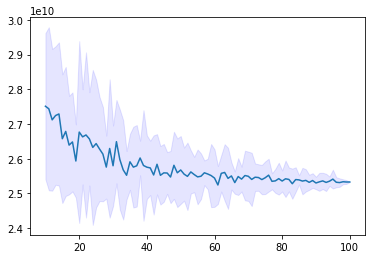

In [50]:
from IMLearn.learners.regressors.linear_regression import LinearRegression
from collections import namedtuple

range_arr = np.arange(10,101,1)
mean_list = []
std_list = []
for p in range_arr:
    p_loss = np.zeros(10)
    for i in range(10):
        sample = train_X.sample(frac=p/100)
        reg_model = LinearRegression()
        reg_model.fit(sample, train_y[sample.index])
        p_loss[i] = reg_model.loss(test_X, test_y)
    mean_list.append(p_loss.mean())
    std_list.append(p_loss.std())
mean_list = np.asarray(mean_list)    
std_list = np.asarray(std_list) 
confidence = 2*std_list

plt.figure()
plt.plot(range_arr,mean_list)
plt.fill_between(range_arr, mean_list-confidence, mean_list+confidence, color='b', alpha=.1)
        

In [51]:
house_prices = pd.read_csv('/home/yishailavi124/IML.HUJI/datasets/house_prices.csv')

In [52]:
df = house_prices.copy()
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.date.apply(lambda x: x.value)
df.date.astype(int)

/home/yishailavi124/anaconda3/envs/iml_v1/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  after removing the cwd from sys.path.


0        1413158400000000000
1        1418083200000000000
2        1424822400000000000
3        1418083200000000000
4        1424217600000000000
                ...         
21611    1400630400000000000
21612    1424649600000000000
21613    1403481600000000000
21614    1421366400000000000
21615    1413331200000000000
Name: date, Length: 21616, dtype: int64

In [53]:
house_prices.date

0        20141013T000000
1        20141209T000000
2        20150225T000000
3        20141209T000000
4        20150218T000000
              ...       
21611    20140521T000000
21612    20150223T000000
21613    20140623T000000
21614    20150116T000000
21615    20141015T000000
Name: date, Length: 21616, dtype: object

In [54]:
house_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21616 entries, 0 to 21615
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21614 non-null  float64
 1   date           21615 non-null  object 
 2   price          21615 non-null  float64
 3   bedrooms       21616 non-null  int64  
 4   bathrooms      21616 non-null  float64
 5   sqft_living    21616 non-null  int64  
 6   sqft_lot       21616 non-null  int64  
 7   floors         21616 non-null  float64
 8   waterfront     21616 non-null  int64  
 9   view           21615 non-null  float64
 10  condition      21615 non-null  float64
 11  grade          21615 non-null  float64
 12  sqft_above     21615 non-null  float64
 13  sqft_basement  21615 non-null  float64
 14  yr_built       21615 non-null  float64
 15  yr_renovated   21615 non-null  float64
 16  zipcode        21615 non-null  float64
 17  lat            21615 non-null  float64
 18  long  

In [55]:
from os.path import join

list(house_prices.columns)

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

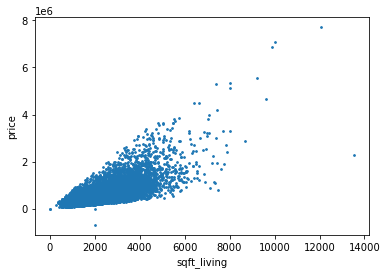

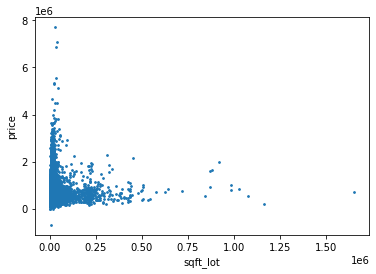

In [56]:
from matplotlib import pyplot as plt

figure = plt.figure(0)
df = house_prices.sort_values(by = 'price')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.scatter(df.sqft_living.values,df.price.values,s=3)
figure = plt.figure(1)
df = house_prices.sort_values(by = 'price')
plt.xlabel('sqft_lot')
plt.ylabel('price')
plt.scatter(df.sqft_lot.values,df.price.values,s=3)

apply df.dropna before working!

id- irrelevant, drop.

date- relevant. should filter by:
"""
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.query('date != "NaT"')
"""
and convert to numerical value via datetime->timestamp.

price- response vector. query price < 1.

bedrooms- important, keep. can be a house with 0 bedrooms??

bathrooms- important, keep. can be a house with no bathroom?? what is 0.75 bathrooms?

sqft_living- important, keep. query non-positive vals.

sqft_lot- important, keep. query non-positive vals.

floors- important, keep. delete zero vals.

waterfront- "categorical", but can be represented as 0,1. keep.

view- important, keep. drop nan values.

condition- important, keep. drop nans and zeros, should be 1-5.

grade- important, keep. drop nans and zeros, should be 1-13.

sqft_above- delete zero/neg vals.

sqft_basement- keep, drop nans

^^ maybe change both to whole sqft instead of above and basement

yr_built- drop zeros, nans. considre replace with other feature.

yr_renovated- drop zeros, nans. consider replace both this and above feature with last renovated feature.

zipcode- consider this later.

lat, lomng- keep

sqft_living15- important, keep. query non-positive vals.

sqft_lot15- important, keep. query non-positive vals.






In [57]:
df.query('yr_renovated == 0')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6383,5.015000e+09,20140625T000000,-690500.0,5,2.00,2000,4211,1.5,0,2.0,...,7.0,1280.0,720.0,1908.0,0.0,98112.0,47.6283,-122.301,1680.0,4000.0
15504,8.860200e+09,20150107T000000,0.0,3,1.50,2000,15265,1.0,0,0.0,...,8.0,1540.0,460.0,1967.0,0.0,98032.0,47.3870,-122.281,1920.0,15265.0
20671,0.000000e+00,0,0.0,0,0.00,0,0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.000,0.0,0.0
1149,3.421079e+09,20150217T000000,75000.0,1,0.00,670,43377,1.0,0,0.0,...,3.0,670.0,0.0,1966.0,0.0,98022.0,47.2638,-121.906,1160.0,42882.0
15293,4.000036e+07,20140506T000000,78000.0,2,1.00,780,16344,1.0,0,0.0,...,5.0,780.0,0.0,1942.0,0.0,98168.0,47.4739,-122.280,1700.0,10387.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,7.558700e+09,20150413T000000,5300000.0,6,6.00,7390,24829,2.0,1,4.0,...,12.0,5000.0,2390.0,1991.0,0.0,98040.0,47.5631,-122.210,4320.0,24619.0
1448,8.907500e+09,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4.0,...,12.0,6720.0,1280.0,2009.0,0.0,98004.0,47.6232,-122.220,4600.0,21750.0
4411,2.470100e+09,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0.0,...,13.0,6200.0,3000.0,2001.0,0.0,98039.0,47.6289,-122.233,3560.0,24345.0
9254,9.208900e+09,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4.0,...,13.0,8860.0,1030.0,2001.0,0.0,98039.0,47.6305,-122.240,4540.0,42730.0


In [58]:
df = house_prices.copy()

# df['date'] = pd.to_datetime(df['date'], errors='coerce')
# df.query('date != "NaT"')

In [59]:
df.dropna()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7.129301e+09,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0.0,...,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,6.414100e+09,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0.0,...,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,5.631500e+09,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0.0,...,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,2.487201e+09,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0.0,...,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,1.954401e+09,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0.0,...,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21611,2.630000e+08,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0.0,...,8.0,1530.0,0.0,2009.0,0.0,98103.0,47.6993,-122.346,1530.0,1509.0
21612,6.600060e+09,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0.0,...,8.0,2310.0,0.0,2014.0,0.0,98146.0,47.5107,-122.362,1830.0,7200.0
21613,1.523300e+09,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0.0,...,7.0,1020.0,0.0,2009.0,0.0,98144.0,47.5944,-122.299,1020.0,2007.0
21614,2.913101e+08,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0.0,...,8.0,1600.0,0.0,2004.0,0.0,98027.0,47.5345,-122.069,1410.0,1287.0


In [60]:
df[df['Temp'] > 5]

KeyError: 'Temp'

In [61]:
from IMLearn.learners.regressors.polynomial_fitting import PolynomialFitting

df = pd.read_csv('./datasets/City_Temperature.csv',parse_dates=True)
df = df.query('Temp > -20').dropna()
df


,Country,City,Date,Year,Month,Day,Temp
0,South Africa,Capetown,1995-01-01,1995,1,1,19.333333
1,South Africa,Capetown,1995-01-02,1995,1,2,19.888889
2,South Africa,Capetown,1995-01-03,1995,1,3,19.388889
3,South Africa,Capetown,1995-01-04,1995,1,4,20.833333
4,South Africa,Capetown,1995-01-05,1995,1,5,21.444444
...,...,...,...,...,...,...,...
32434,Jordan,Amman,2020-05-09,2020,5,9,17.555556
32435,Jordan,Amman,2020-05-10,2020,5,10,17.055556
32436,Jordan,Amman,2020-05-11,2020,5,11,20.666667
32437,Jordan,Amman,2020-05-12,2020,5,12,24.444444


In [62]:
from datetime import datetime

df['DayOfYear'] = df['Date'].apply(lambda x: int(datetime.strptime(x,'%Y-%m-%d').strftime('%j')))

In [63]:
df

,Country,City,Date,Year,Month,Day,Temp,DayOfYear
0,South Africa,Capetown,1995-01-01,1995,1,1,19.333333,1
1,South Africa,Capetown,1995-01-02,1995,1,2,19.888889,2
2,South Africa,Capetown,1995-01-03,1995,1,3,19.388889,3
3,South Africa,Capetown,1995-01-04,1995,1,4,20.833333,4
4,South Africa,Capetown,1995-01-05,1995,1,5,21.444444,5
...,...,...,...,...,...,...,...,...
32434,Jordan,Amman,2020-05-09,2020,5,9,17.555556,130
32435,Jordan,Amman,2020-05-10,2020,5,10,17.055556,131
32436,Jordan,Amman,2020-05-11,2020,5,11,20.666667,132
32437,Jordan,Amman,2020-05-12,2020,5,12,24.444444,133


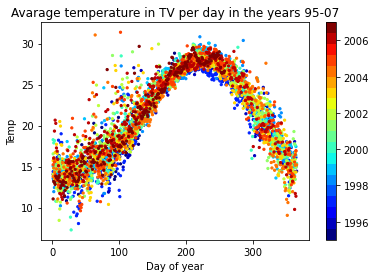

In [65]:
idf = df.query('Country == "Israel"')
plt.figure()
cmap = plt.get_cmap('jet', 20)
cmap.set_under('gray')
sc = plt.scatter(idf.DayOfYear.values, idf.Temp.values, s=5, c=idf.Year.values, cmap=cmap)
plt.colorbar(sc)
plt.ylabel('Temp')
plt.xlabel('Day of year')
plt.title('Avarage temperature in TV per day in the years 95-07')
plt.show()

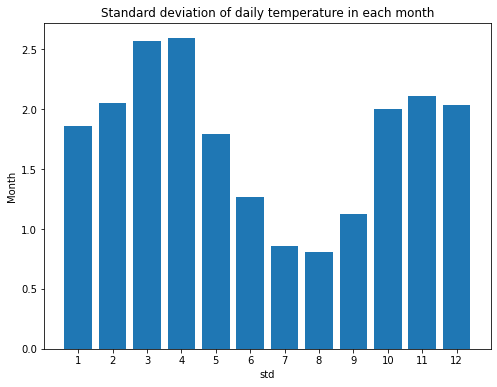

In [67]:
months = np.arange(1,13,1)

plt.figure(figsize=(8,6))
plt.bar(months, idf.groupby('Month').Temp.agg('std'), tick_label=months)
plt.xlabel('std')
plt.ylabel('Month')
plt.title('Standard deviation of daily temperature in each month')
plt.show()

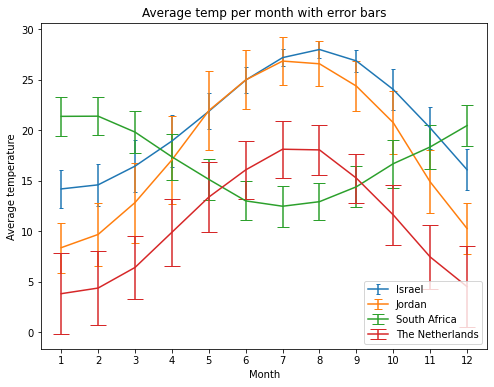

In [68]:
groups = df.groupby(['Country','Month']).Temp.agg(['mean','std'])

plt.figure(figsize=(8,6))
for i, (country, data) in enumerate(groups.groupby(level=0)):
    plt.errorbar(months,data['mean'].values,data['std'].values,label=country,capsize=(i+1)*2)
plt.legend(loc='lower right')
plt.xticks(months)
plt.xlabel('Month')
plt.ylabel('Average temperature')
plt.title('Average temp per month with error bars')
plt.show()

[22.40728282  6.71585899  3.50261745  2.9446685   2.82418199  6.62367843
 14.61783651 30.25854992 30.25860538 30.27599256]


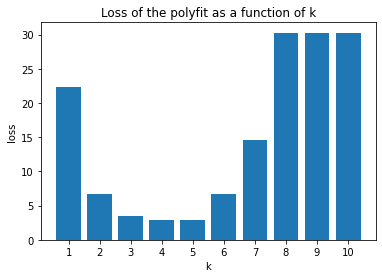

In [71]:
from IMLearn import utils

X, y = idf.DayOfYear, idf.Temp
train_X, train_y, test_X, test_y = utils.split_train_test(X,y,0.75)
loss = np.zeros(10)
for i in range(10):
    polyfit = PolynomialFitting(i+1)
    polyfit.fit(train_X,train_y)
    loss[i] = polyfit.loss(test_X, test_y)
print(loss)

plt.figure()
plt.bar(np.arange(1,11),loss)
plt.xticks(np.arange(1,11))
plt.xlabel('k')
plt.ylabel('loss')
plt.title('Loss of the polyfit as a function of k')    
plt.show()


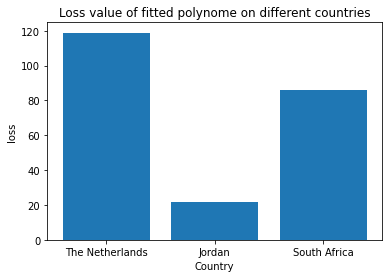

In [72]:
ipolyfit = PolynomialFitting(5)
X,y = idf.DayOfYear, idf.Temp
ipolyfit.fit(X,y)

countries = ['The Netherlands', 'Jordan', 'South Africa']
loss = np.zeros(3)
for i, country in enumerate(countries):
    cur_df = df.query('Country == @country')
    cur_X, cur_y = cur_df.DayOfYear, cur_df.Temp
    loss[i] = ipolyfit.loss(cur_X, cur_y)
    
plt.bar(countries, loss)
plt.xlabel('Country')
plt.ylabel('loss')
plt.title('Loss value of fitted polynome on different countries')
plt.show()

In [74]:
ipolyfit._reg.coefs_

array([ 1.43248824e+01, -1.24323953e-02,  2.55568569e-04,  5.53567676e-06,
       -3.35327678e-08,  4.58247190e-11])

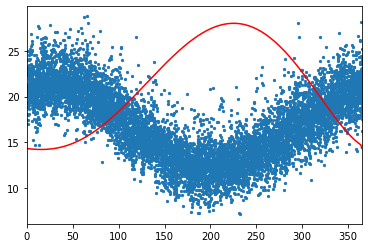

In [ ]:
ndf = df.query('Country == "South Africa"')
plt.scatter(ndf.DayOfYear.values,ndf.Temp.values,s=5)
#plt.show()
plt.plot(ipolyfit.predict(ndf.DayOfYear),c='r')
plt.xlim(0,365)
plt.show()